<center><img src="informe.png" width='500' height='200'> </center>

## Análisis Exploratorio

In [1]:
# 1) Importo las librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 2) Cargo los datos
df=pd.read_csv('exams.csv')
df

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0


In [3]:
# 3) Comienza la exploración. Las primeras 5 filas
df.head(6)

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
0,10-5894942,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0
1,41-1676468,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0
2,64-6396924,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0
3,35-2426788,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0
4,60-9387304,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0
5,67-3666190,female,group D,high school,standard,yes,none,63.0,77.0,76.0,72.0


In [4]:
# 4) Comienza la exploración. Las últimas 5 filas
df.tail()

,id,gender,race/ethnicity,parental level of education,lunch,employed,test preparation course,math score,physics score,chemistry score,algebra_score
1013,82-7312119,male,group E,associate's degree,standard,yes,none,74.0,73.0,67.0,71.0
1014,45-3445439,male,group E,some college,free/reduced,no,none,78.0,84.0,77.0,80.0
1015,02-3651562,male,group A,some college,standard,no,completed,78.0,78.0,74.0,77.0
1016,05-5203587,female,group B,some college,standard,yes,none,75.0,76.0,81.0,77.0
1017,13-3347050,male,group D,some college,standard,no,completed,70.0,60.0,65.0,65.0


In [5]:
# 5) Resumen estadístico
df.describe()

,math score,physics score,chemistry score,algebra_score
count,1011.000000,1011.000000,1011.000000,1011.000000
mean,66.480712,69.063304,67.789318,67.778437
std,15.326880,14.694107,15.559853,14.450680
min,13.000000,27.000000,23.000000,22.000000
25%,56.000000,60.000000,58.000000,59.000000
50%,67.000000,70.000000,68.000000,68.000000
75%,77.000000,79.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000,100.000000


In [6]:
# 6) Tipos de datos
df.dtypes

id                              object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
employed                        object
test preparation course         object
math score                     float64
physics score                  float64
chemistry score                float64
algebra_score                  float64
dtype: object

### Limpieza y orden de datos

In [7]:
# 7) Elimino duplicados

print(f'Original: {df.id.count()} filas')
duplicate_rows_df = df[df.duplicated()]
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.id.count()}')

# método

df=df.drop_duplicates()


Original: 1018 filas
Cantidad de filas duplicadas: 18


In [8]:
# 8) Verifico la eliminacion de duplicados (menos filas)

print(f'Original: {df.id.count()} filas')

Original: 1000 filas


In [9]:
# 9) Elimino columnas irrelevantes
print (df.columns)
df=df.drop(['id'], axis=1)

Index(['id', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'employed', 'test preparation course', 'math score',
       'physics score', 'chemistry score', 'algebra_score'],
      dtype='object')


In [10]:
#verifico que se halla eliminado la columna
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'employed', 'test preparation course', 'math score', 'physics score',
       'chemistry score', 'algebra_score'],
      dtype='object')


In [11]:
# 10) Renombro las columnas para que quede mas prolijo

df= df.rename(columns = {
    "gender": "Gender",
    "race/ethnicity": "Ethnicity",
    "parental level of education": "Parental Level of Education",
    "lunch": "Lunch",
    "employed": "Employed",
    "test preparation course" : "Test Preparation Course",
    "math score" : "Math Score",
    "physics score" : "Physics Score",
    "chemistry score" : "Chemistry Score",
    "algebra_score" : "Algebra Score"
}
)
df.columns

Index(['Gender', 'Ethnicity', 'Parental Level of Education', 'Lunch',
       'Employed', 'Test Preparation Course', 'Math Score', 'Physics Score',
       'Chemistry Score', 'Algebra Score'],
      dtype='object')

In [12]:
# 11) Elimino los valores nulos
# encuentro los valores nulos

print(df.isnull().sum())


Gender                         0
Ethnicity                      0
Parental Level of Education    0
Lunch                          0
Employed                       0
Test Preparation Course        0
Math Score                     7
Physics Score                  7
Chemistry Score                7
Algebra Score                  7
dtype: int64


In [13]:
# metodo para eliminar los nulos
df= df.dropna()
print(df.isnull().sum())

Gender                         0
Ethnicity                      0
Parental Level of Education    0
Lunch                          0
Employed                       0
Test Preparation Course        0
Math Score                     0
Physics Score                  0
Chemistry Score                0
Algebra Score                  0
dtype: int64


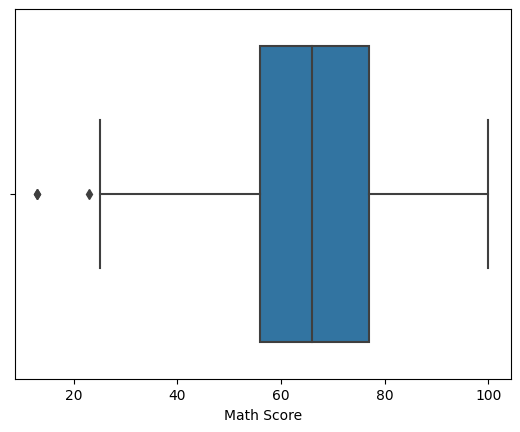

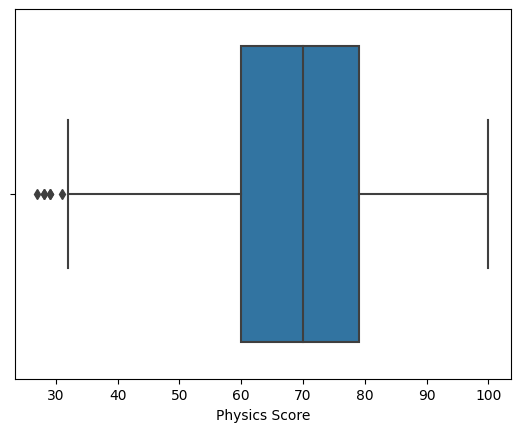

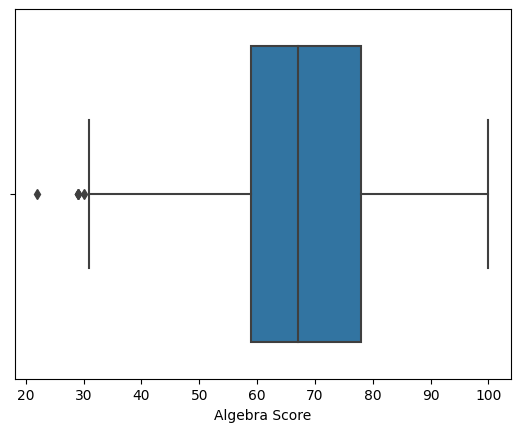

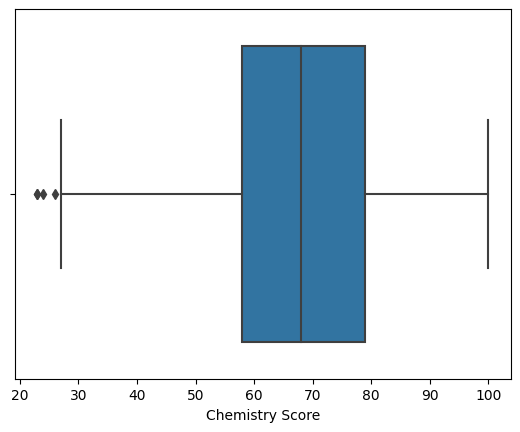

In [14]:
# 12) Detecto Outliers
sns.boxplot(x=df['Math Score'])
plt.show()

sns.boxplot(x=df['Physics Score'])
plt.show()

sns.boxplot(x=df['Algebra Score'])
plt.show()

sns.boxplot(x=df['Chemistry Score'])
plt.show()

In [15]:
# Limpieza de otutliers y verificación

print(f'Antes: {df.Lunch.count()} filas\n')
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
print(IQR)

df=df[~((df < (Q1 -1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'\n Después: {df.Lunch.count()} filas' )

Antes: 993 filas

Math Score         21.0
Physics Score      19.0
Chemistry Score    21.0
Algebra Score      19.0
dtype: float64

 Después: 984 filas
/tmp/ipykernel_73/575575890.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df < (Q1 -1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
/tmp/ipykernel_73/575575890.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df < (Q1 -1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


### Frecuencias y correlaciones

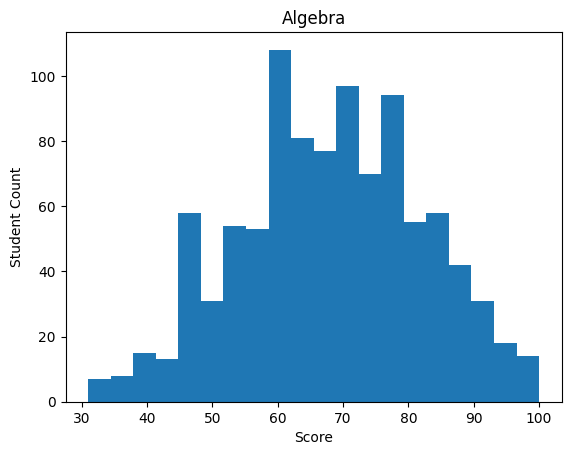

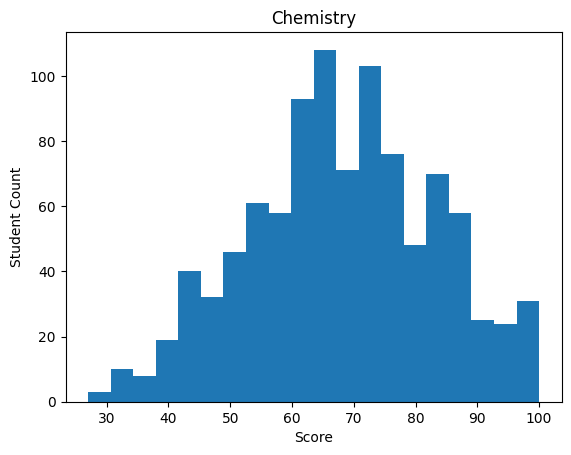

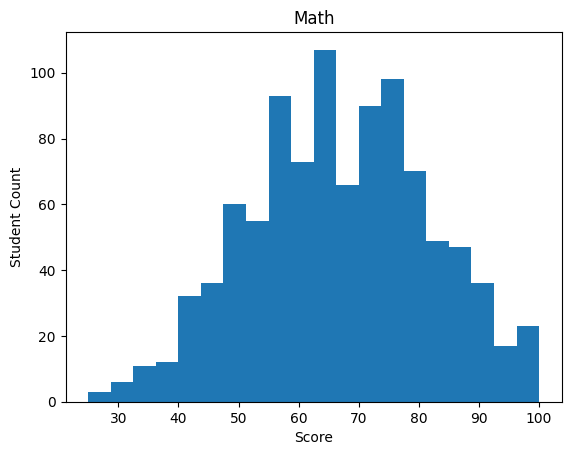

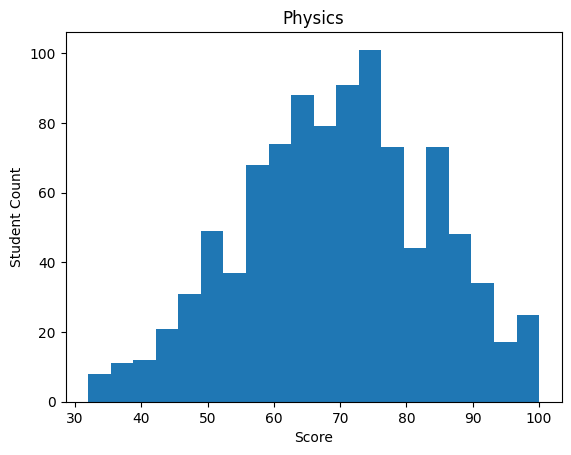

In [16]:
# 13) Encuentro correlaciones y frecuencias

plt.hist(df['Algebra Score'], bins=20)
plt.title('Algebra')
plt.ylabel('Student Count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Chemistry Score'], bins=20)
plt.title('Chemistry')
plt.ylabel('Student Count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Math Score'], bins=20)
plt.title('Math')
plt.ylabel('Student Count')
plt.xlabel('Score')
plt.show()

plt.hist(df['Physics Score'], bins=20)
plt.title('Physics')
plt.ylabel('Student Count')
plt.xlabel('Score')
plt.show()

In [17]:
# 15) Creo un mapa de calor
#   Primero creo una matriz 

c=df.corr()
print(c)

                 Math Score  Physics Score  Chemistry Score  Algebra Score
Math Score         1.000000       0.812055         0.798312       0.916674
Physics Score      0.812055       1.000000         0.951536       0.968358
Chemistry Score    0.798312       0.951536         1.000000       0.964652
Algebra Score      0.916674       0.968358         0.964652       1.000000


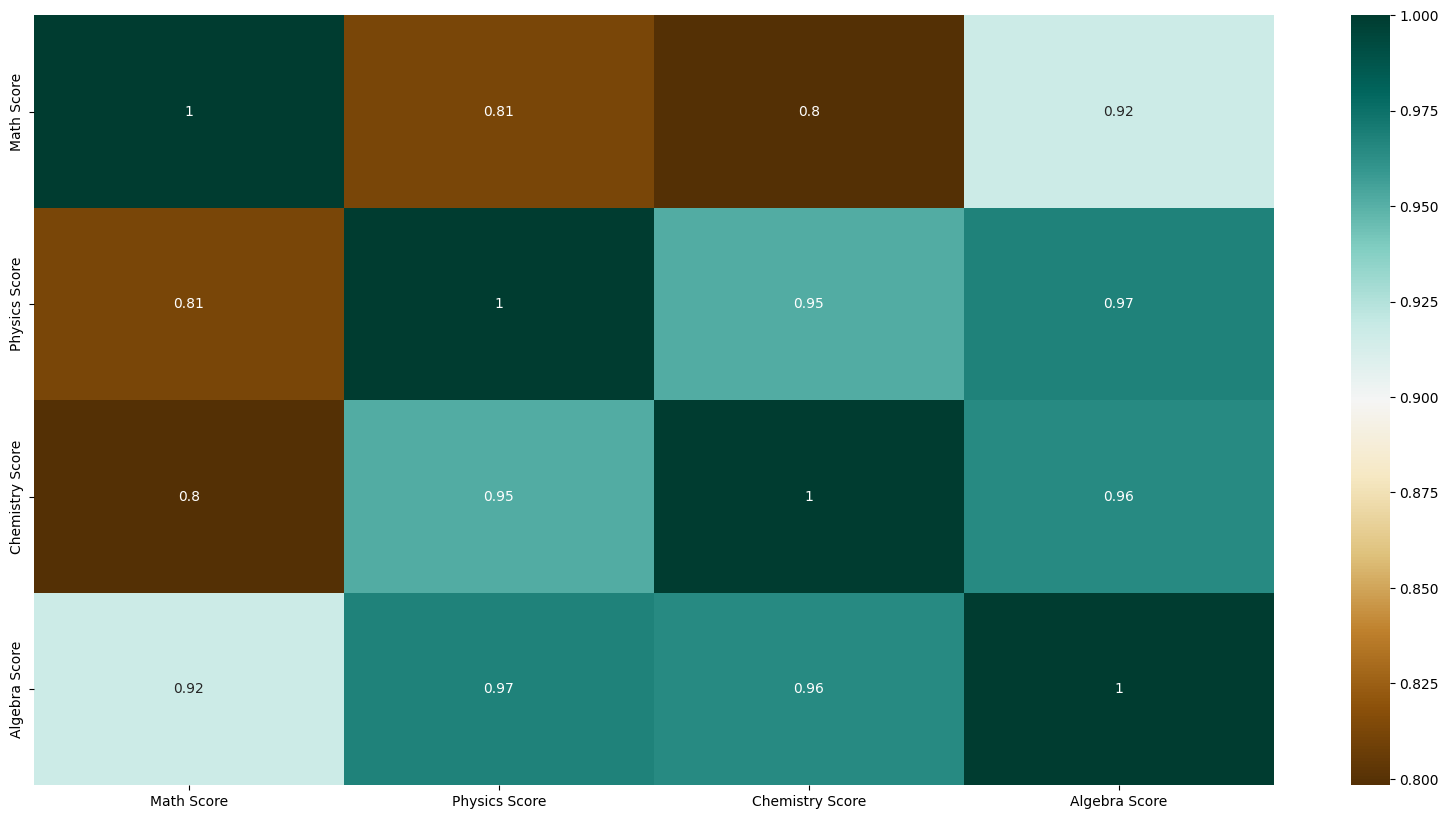

In [18]:
# metodo de mapa de calor

plt.figure(figsize=(20, 10))
sns.heatmap(c,cmap= "BrBG", annot=True)
plt.show()

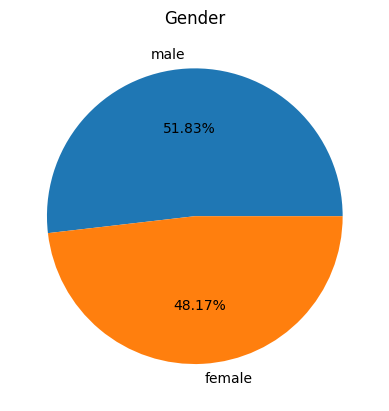

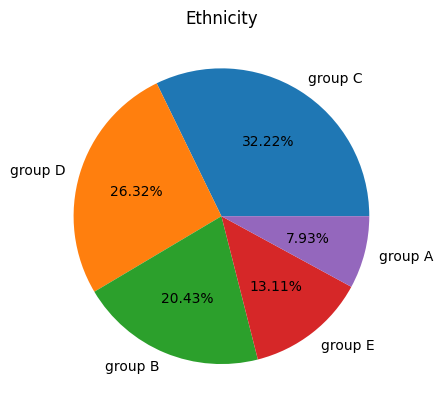

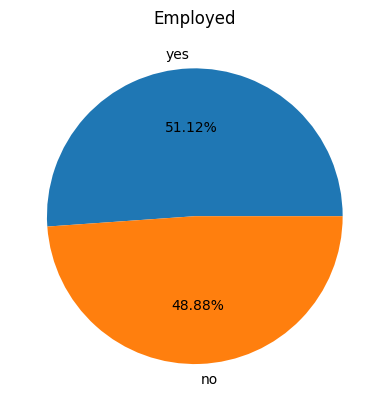

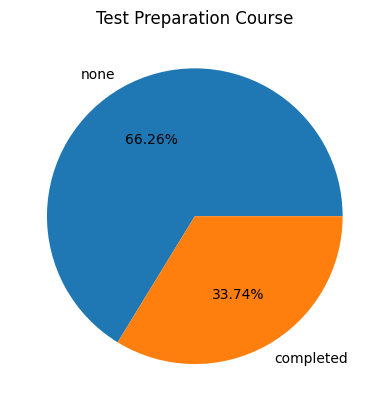

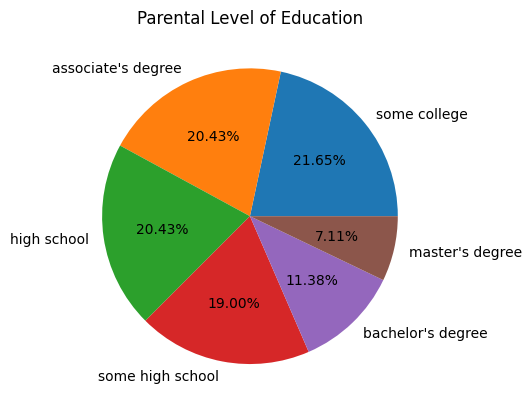

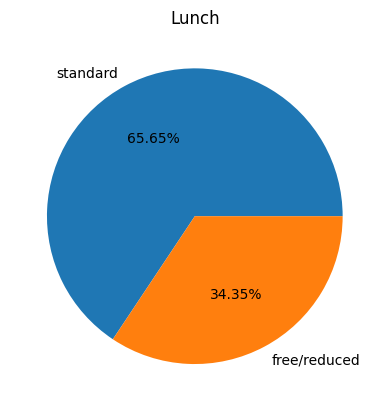

In [19]:
# 16) Graficas circulares 
# Formato de la gráfica de variables categóricas

labels= df["Gender"].value_counts().index
sizes= df["Gender"].value_counts()
plt.pie(sizes, labels=labels, autopct= '%1.2f%%')
plt.title('Gender')
plt.show()

labels= df["Ethnicity"].value_counts().index
sizes= df["Ethnicity"].value_counts()
plt.pie(sizes, labels=labels, autopct= '%1.2f%%')
plt.title('Ethnicity')
plt.show()

labels= df["Employed"].value_counts().index
sizes= df["Employed"].value_counts()
plt.pie(sizes, labels=labels, autopct= '%1.2f%%')
plt.title('Employed')
plt.show()

labels= df["Test Preparation Course"].value_counts().index
sizes= df["Test Preparation Course"].value_counts()
plt.pie(sizes, labels=labels, autopct= '%1.2f%%')
plt.title('Test Preparation Course')
plt.show()

labels= df["Parental Level of Education"].value_counts().index
sizes= df["Parental Level of Education"].value_counts()
plt.pie(sizes, labels=labels, autopct= '%1.2f%%')
plt.title('Parental Level of Education')
plt.show()

labels= df["Lunch"].value_counts().index
sizes= df["Lunch"].value_counts()
plt.pie(sizes, labels=labels, autopct= '%1.2f%%')
plt.title('Lunch')
plt.show()


## Respondiendo Preguntas

### ¿Qué relación existe entre el promedio de las notas y haber realizado el curso preparatorio?

In [20]:
df['Average Score']= df.mean(axis=1)
#axis 1 hace que la funcion se aplique sobre los valoes numericos
df

,Gender,Ethnicity,Parental Level of Education,Lunch,Employed,Test Preparation Course,Math Score,Physics Score,Chemistry Score,Algebra Score,Average Score
0,male,group A,high school,standard,yes,completed,67.0,67.0,63.0,66.0,65.75
1,female,group D,some high school,free/reduced,no,none,40.0,59.0,55.0,51.0,51.25
2,male,group E,some college,free/reduced,no,none,59.0,60.0,50.0,56.0,56.25
3,male,group B,high school,standard,yes,none,77.0,78.0,68.0,74.0,74.25
4,male,group E,associate's degree,standard,yes,completed,78.0,73.0,68.0,73.0,73.00
...,...,...,...,...,...,...,...,...,...,...,...
1001,male,group C,high school,standard,yes,none,73.0,70.0,65.0,69.0,69.25
1002,male,group D,associate's degree,free/reduced,no,completed,85.0,91.0,92.0,89.0,89.25
1003,female,group C,some high school,free/reduced,yes,none,32.0,35.0,41.0,36.0,36.00
1004,female,group C,some college,standard,yes,none,73.0,74.0,82.0,76.0,76.25


In [21]:
si = df[df['Test Preparation Course'] == 'completed']
no = df[df['Test Preparation Course'] == 'none']

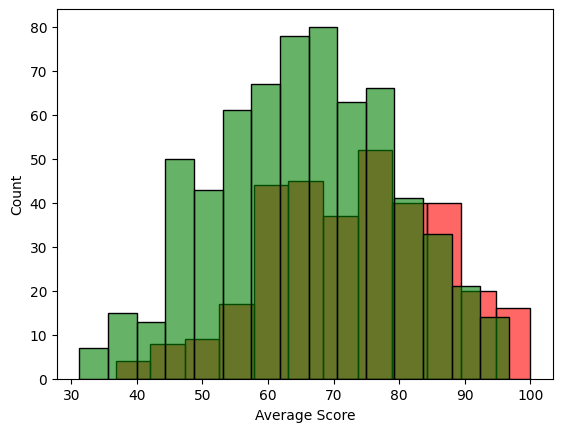

In [22]:
si = df[df['Test Preparation Course'] == 'completed']
no = df[df['Test Preparation Course'] == 'none']

sns.histplot(si['Average Score'], color= "red", alpha=.6, fill=True)
sns.histplot(no['Average Score'], color= "green", alpha=.6, fill=True)
plt.show()

In [23]:
print("Realizaron el curso: ", si['Test Preparation Course'].count())
print("No realizaron el curso: ", no['Test Preparation Course'].count())

Realizaron el curso:  332
No realizaron el curso:  652


En la gráfica se puede observar que el número de personas que no realizaron el curso son muchos más que los que si lo realizaron. Se podría considerar este dato para cambiar cuestiones asociadas a la oferta del curso. Por ejemplo, cambiar la modalidad de cursada (presencial, virtual, hibrida, asincrónica etc), cambiar los contenidos o la oferta horaria, etc.

### ¿Qué desempeño (referido a notas) tuvieron los estudiantes según el nivel de educación de los padres? Discriminado por género.

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

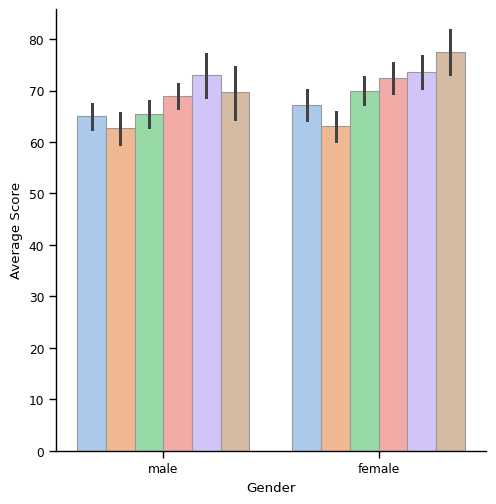

In [24]:
par= df['Parental Level of Education']
asc = df['Average Score']
gen = df ['Gender']
sns.set_context("paper")

sns.catplot(x=gen, y=asc, hue=par, kind='bar', data=df, palette="pastel", edgecolor=".6")

#como hago para que me muestre las referencias?

En este gráfico quería observar si hay una relación entre el conocimiento que los alumnos tienen de base considerando que los padres que tienen mayor grado de titulación tendrán hijos con más conocimientos de estas materias y a la vez discriminarlo por género para evaluar si es necesario aplicar un enfoque de este tipo en la forma que está dictada la cursada. Pero debido a que no se como lograr poner las etiquetas en el gráfico no pude llegar a una conclusión.

### Existe alguna relación entre la educación que recibieron los padres, las notas de las materias y el curso preparatorio?

<AxesSubplot: xlabel='Average Score', ylabel='Parental Level of Education'>

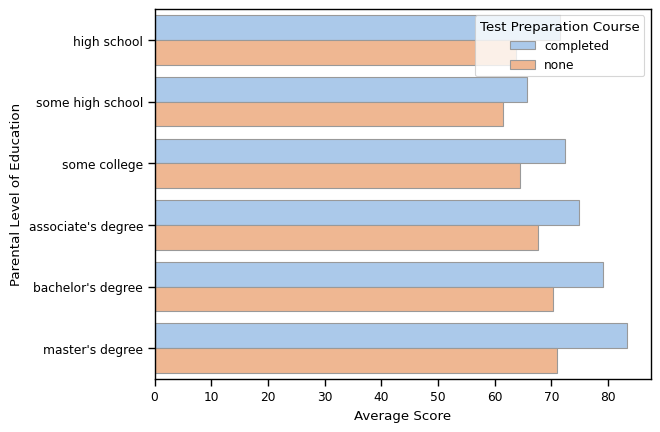

In [45]:
asc = df['Average Score']
par= df['Parental Level of Education']
tpc =df['Test Preparation Course']
sns.set_context("paper")


sns.barplot(y=par, x=asc, hue=tpc , errorbar=None, data=df, palette="pastel", edgecolor=".6")

Se puede apreciar que tanto los que completaron el curso como los alumos cuyos padres tenían una maestría en algpun campo fueron los que mejor promedio tuvieron en las materias.

### ¿Cuál es a distribución del puntaje según sexo?

<AxesSubplot: xlabel='Average Score', ylabel='Count'>

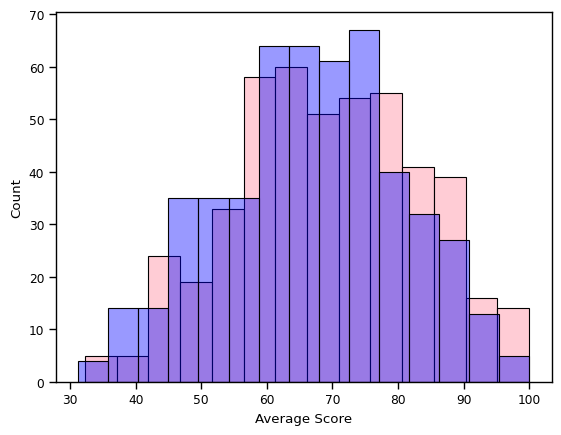

In [48]:
masc = df[df['Gender'] == 'male']
fem = df[df['Gender'] == 'female']
gender= df["Gender"]

sns.histplot(fem['Average Score'], color="pink", alpha=.8, fill=True)
sns.histplot(masc['Average Score'], color="blue", alpha=.4, fill=True)

In [49]:
print(df['Gender'].value_counts())

male      510
female    474
Name: Gender, dtype: int64


Si bien se puede observar que la cantidad de varones es mayor a la de mujeres, los mejores promedios (mayores a 80) se distribuyen mayormente en mujeres, mientras que los varones tienen los peores promedios (menores a 60).

### ¿Cuántos pudieron o no hacer el curso? relacionarlo con empleo y genero.

In [59]:
import plotly.express as px
tp= df['Test Preparation Course'].value_counts()
e = df['Employed'].value_counts()
g= df['Gender'].value_counts()

print("Test Preparation course: \n {} , Employed \n {}, Gender \n {}".format (tp, e, g))

#como hago para que me muestre las etiquetas de los datos?

fig = px.sunburst(df, path=[e, g], values=tp)
fig.show()

Test Preparation course: 
 none         652
completed    332
Name: Test Preparation Course, dtype: int64 , Employed 
 yes    503
no     481
Name: Employed, dtype: int64, Gender 
 male      510
female    474
Name: Gender, dtype: int64


El círculo interno muestra los datos asociados a "Employment", la cantidad de gente que trabajaba (503), y la que no estaba trabajando  (481). 

El circulo externo  muestra los datos asociados a "Gender" de esas personas cuantas son mujeres (474) o varones (510). La división de colores representa adicionalmente cuántos realizaron el curso (rojo, valor= 332) y cuantos no (violeta, valor= 652).

Se puede establecer una relación que indica que la mayoría de las personas que no realizaron el curso son varones y estaban trabajando.

### Conclusión:

A nivel general se pueden poner en práctica cambios en la oferta académica del curso preparatorio para mejorar el promedio de las materias.  Considerando que se observa que los varones no asisten al curso, son los que tienen presentan menos promedio, y adicionalmente se encuentran trabajando lo que tal vez les imposibilite asistir a las cursadas que se ofrecen.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3ee10386-74c9-4242-86cb-5f710e5c8e91' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>